In [301]:
# import libraries
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import keras
from keras.preprocessing.sequence import TimeseriesGenerator

import warnings
warnings.filterwarnings("ignore")

import plotly.graph_objects as go

np.random.seed(1)
tf.random.set_seed(1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed, Bidirectional

[Predicting Sequential Data using LSTM: An Introduction](https://towardsdatascience.com/time-series-forecasting-with-recurrent-neural-networks-74674e289816)

In [302]:
huwaei=pd.read_csv('training_100.csv')
huwaei['timestamp']=pd.to_datetime(huwaei['timestamp'])
huwaei.head() 
huwaei.tail()

,timestamp,kpi_value,request_count,anomaly_label
20154,2020-08-28 01:56:00+02:00,0.998149,26467,0
20155,2020-08-28 01:57:00+02:00,0.998340,26502,0
20156,2020-08-28 01:58:00+02:00,0.998364,26887,0
20157,2020-08-28 01:59:00+02:00,0.998428,26712,0
20158,2020-08-28 02:00:00+02:00,0.997407,29694,0


In [303]:
kpi=huwaei['kpi_value']
timestamp=huwaei['timestamp']
label=huwaei['anomaly_label']

Text(0.5, 1.0, 'Huwaei Dataset')

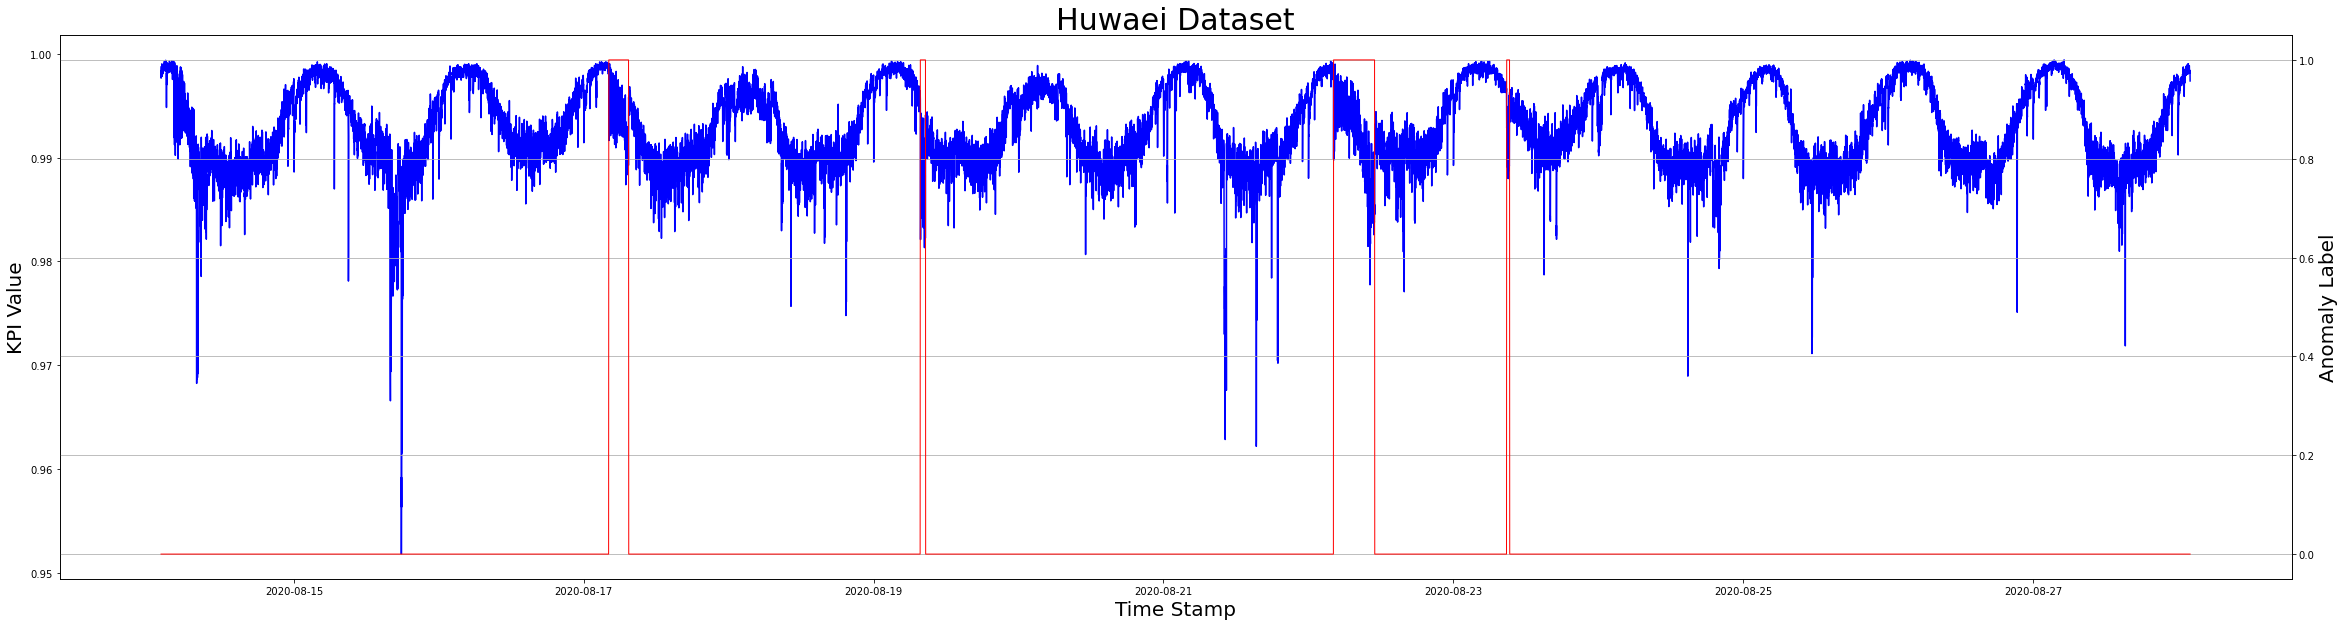

In [304]:
fig, ax2d = plt.subplots(figsize=(40,10))
ax2a = ax2d.twinx()
ax2d.plot(timestamp, kpi, color='blue')
ax2a.plot(timestamp, label, color='red', linewidth='1')
ax2d.set_xlabel('Time Stamp', fontsize=20)
ax2d.set_ylabel('KPI Value', fontsize=20)
ax2a.set_ylabel('Anomaly Label', fontsize=20)

plt.grid()

plt.title('Huwaei Dataset', fontsize=30)

In [305]:
print(f"Length of full data: {len(huwaei)}")

Length of full data: 20159


In [306]:
x=huwaei[0:50]
y=huwaei[100:150]

x=pd.DataFrame(x)
y=pd.DataFrame(y)

frames=[x,y]
results=pd.concat(frames)
results

,timestamp,kpi_value,request_count,anomaly_label
0,2020-08-14 02:00:00+02:00,0.998755,24908,0
1,2020-08-14 02:01:00+02:00,0.997683,25029,0
2,2020-08-14 02:02:00+02:00,0.998341,24115,0
3,2020-08-14 02:03:00+02:00,0.998211,24031,0
4,2020-08-14 02:04:00+02:00,0.998403,23790,0
...,...,...,...,...
145,2020-08-14 04:25:00+02:00,0.997948,20954,0
146,2020-08-14 04:26:00+02:00,0.991813,21132,0
147,2020-08-14 04:27:00+02:00,0.998292,21080,0
148,2020-08-14 04:28:00+02:00,0.998045,20967,0


In [307]:
arr=np.where(label==1)
arr

(array([ 4448,  4449,  4450,  4451,  4452,  4453,  4454,  4455,  4456,
         4457,  4458,  4459,  4460,  4461,  4462,  4463,  4464,  4465,
         4466,  4467,  4468,  4469,  4470,  4471,  4472,  4473,  4474,
         4475,  4476,  4477,  4478,  4479,  4480,  4481,  4482,  4483,
         4484,  4485,  4486,  4487,  4488,  4489,  4490,  4491,  4492,
         4493,  4494,  4495,  4496,  4497,  4498,  4499,  4500,  4501,
         4502,  4503,  4504,  4505,  4506,  4507,  4508,  4509,  4510,
         4511,  4512,  4513,  4514,  4515,  4516,  4517,  4518,  4519,
         4520,  4521,  4522,  4523,  4524,  4525,  4526,  4527,  4528,
         4529,  4530,  4531,  4532,  4533,  4534,  4535,  4536,  4537,
         4538,  4539,  4540,  4541,  4542,  4543,  4544,  4545,  4546,
         4547,  4548,  4549,  4550,  4551,  4552,  4553,  4554,  4555,
         4556,  4557,  4558,  4559,  4560,  4561,  4562,  4563,  4564,
         4565,  4566,  4567,  4568,  4569,  4570,  4571,  4572,  4573,
      

In [308]:
train=huwaei[0:4401]
test=huwaei[4402:5001]

In [311]:
label2=label[0:5001]
label2
print(f"Dataset Length: {len(train)+len(test)}")

Dataset Length: 5000


Text(0.5, 1.0, 'Huwaei Dataset')

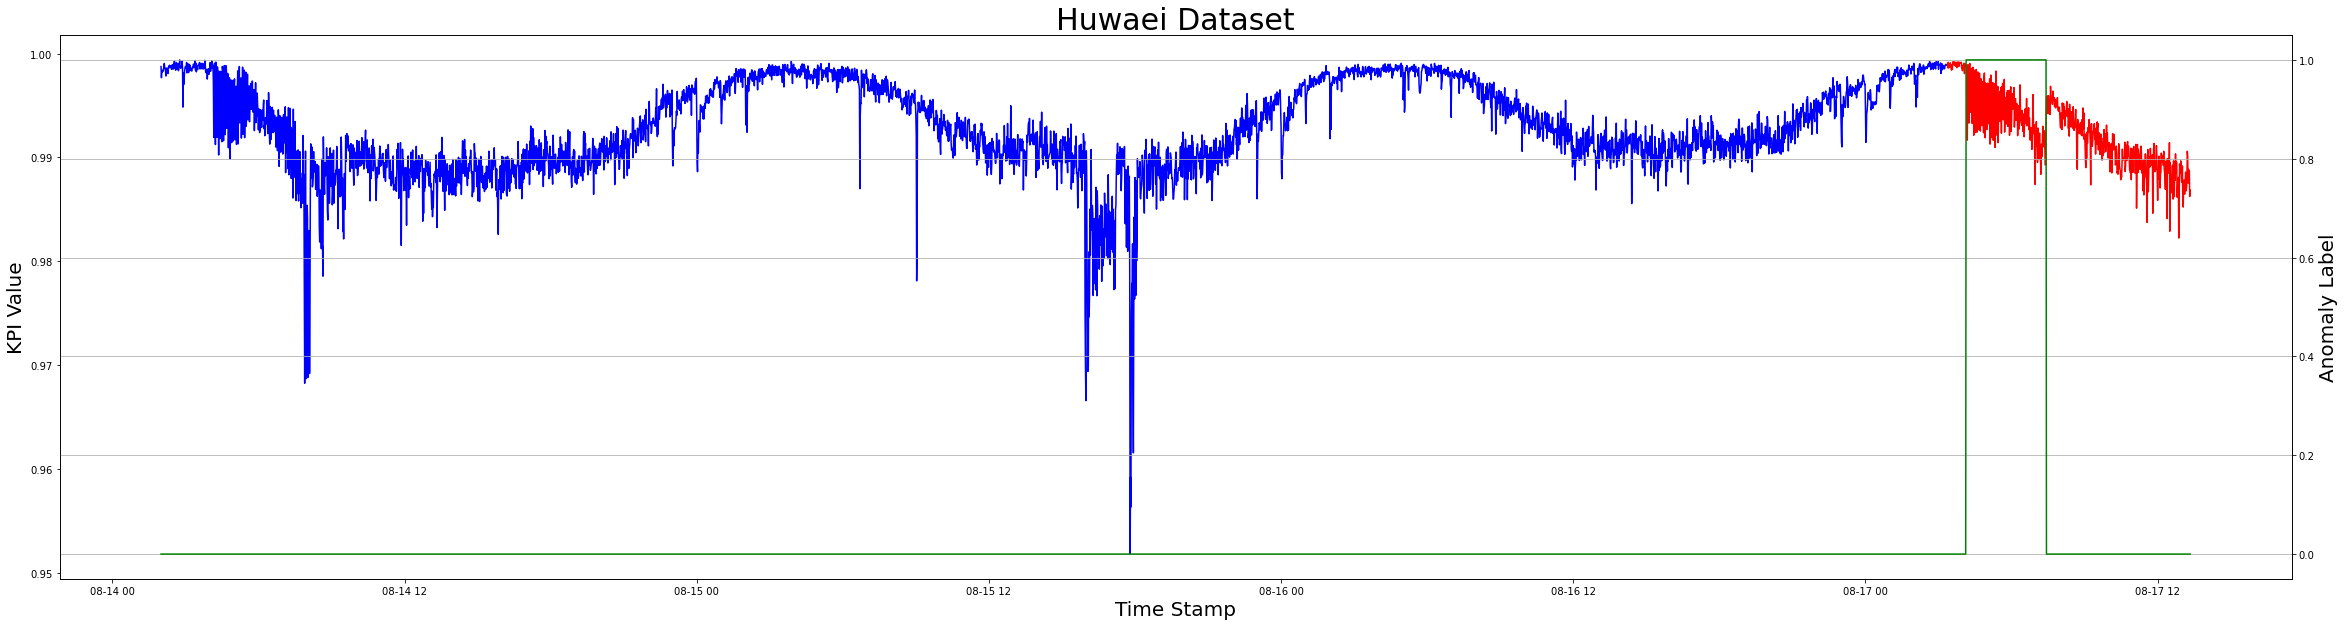

In [312]:
fig, ax2d = plt.subplots(figsize=(40,10))
ax2a = ax2d.twinx()
ax2d.plot(train['timestamp'], train['kpi_value'], color='blue')
ax2d.plot(test['timestamp'], test['kpi_value'], color='red')
ax2a.plot(timestamp[0:5001], label2, color='green', linewidth='1.5')
ax2d.set_xlabel('Time Stamp', fontsize=20)
ax2d.set_ylabel('KPI Value', fontsize=20)
ax2a.set_ylabel('Anomaly Label', fontsize=20)

plt.grid()

plt.title('Huwaei Dataset', fontsize=30)

In [259]:
print(f"Total Training Samples: {len(train)}")
print(f"Total Testing Samples: {len(test)}")
print(f"Training Percentage: {round((100*len(train))/(len(train)+len(test)),2)} %")

Total Training Samples: 4401
Total Testing Samples: 599
Training Percentage: 88.02 %


In [260]:
train=train['kpi_value']
train=np.array(train)

In [261]:
test=test['kpi_value']
test=np.array(test)

In [262]:
print(train)

[0.99875542 0.99768269 0.99834128 ... 0.99897568 0.998896   0.99891385]


In [263]:
print(test)

[0.99895411 0.99864392 0.99916925 0.99862899 0.99898428 0.99867068
 0.9989641  0.99911782 0.99883658 0.99876864 0.99841772 0.99894209
 0.99847636 0.99909058 0.99922899 0.99901887 0.99893192 0.99889314
 0.99921278 0.99896689 0.99879401 0.99888242 0.99915935 0.99865041
 0.9987392  0.99878243 0.99921975 0.99912892 0.99876521 0.99895635
 0.99917306 0.99913491 0.99907561 0.99912668 0.99917695 0.998627
 0.99882761 0.99835338 0.99890431 0.99883314 0.99885163 0.99908387
 0.9980756  0.99902511 0.99873572 0.99896045 0.99875848 0.99863549
 0.99326869 0.99167059 0.99891376 0.99894306 0.99543336 0.99331135
 0.99839266 0.99906231 0.99570365 0.99435213 0.99786304 0.99858644
 0.99536669 0.99327524 0.99815498 0.99868871 0.99570314 0.992141
 0.99699333 0.99838931 0.99462742 0.99241639 0.99652215 0.99848685
 0.99548858 0.99243499 0.99704472 0.99823826 0.99575098 0.99266855
 0.9965598  0.99810606 0.99623415 0.99254338 0.99593023 0.99757973
 0.99618992 0.99305825 0.99731458 0.99677062 0.9953316  0.99237047

The "[TimeseriesGenerator](https://keras.io/api/preprocessing/timeseries/)" function accepts a sequence of data points collected at equal intervals, as well as time-series characteristics such as sequence/window length, spacing between two sequences/windows, and so on, to generate batches of time-series inputs and targets.

In [264]:
look_back = 32 # We could change to 60 or set to 30 for default

train_generator = TimeseriesGenerator(train, train, length=look_back, batch_size=20) #change the batch size     
test_generator = TimeseriesGenerator(test, test, length=look_back, batch_size=1)

In [265]:
train_generator[0][1]

array([0.99850734, 0.9990173 , 0.99900493, 0.99928742, 0.99860323,
       0.99905054, 0.99840997, 0.9988464 , 0.99914959, 0.99851064,
       0.99890641, 0.99864032, 0.99903625, 0.99836128, 0.99882879,
       0.99898469, 0.99939922, 0.99867004, 0.99861382, 0.99859557])

In [266]:
test_generator[0][1]

array([0.99917306])

In [267]:
print(train_generator[0][1].shape)
print(test_generator[0][1].shape)

(20,)
(1,)


# Creating the Neural Network

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 64)                16896     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
219/219 [==============================] - 2s 8ms/step - loss: 0.0330
Epoch 2/10
219/219 [==============================] - 2s 7ms/step - loss: 3.9330e-06
Epoch 3/10
219/219 [==============================] - 2s 7ms/step - loss: 4.1780e-06
Epoch 4/10
219/219 [==============================] - 1s 7ms/step - loss: 4.0145e-06
Epoch 5/10
219/219 [==============================] - 2s 7ms/step - loss: 4.1783e-06
Epoch 6/10
219/219 [=====

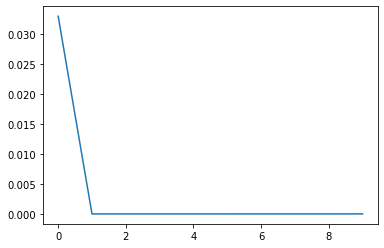

In [268]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(look_back,1)))
model.add(Dense(1))
opt = tf.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')
model.summary()

num_epochs = 10
history=model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

plt.plot(history.history['loss'], label='Training loss')

Reconstruction error threshold: 0.019567547467215313


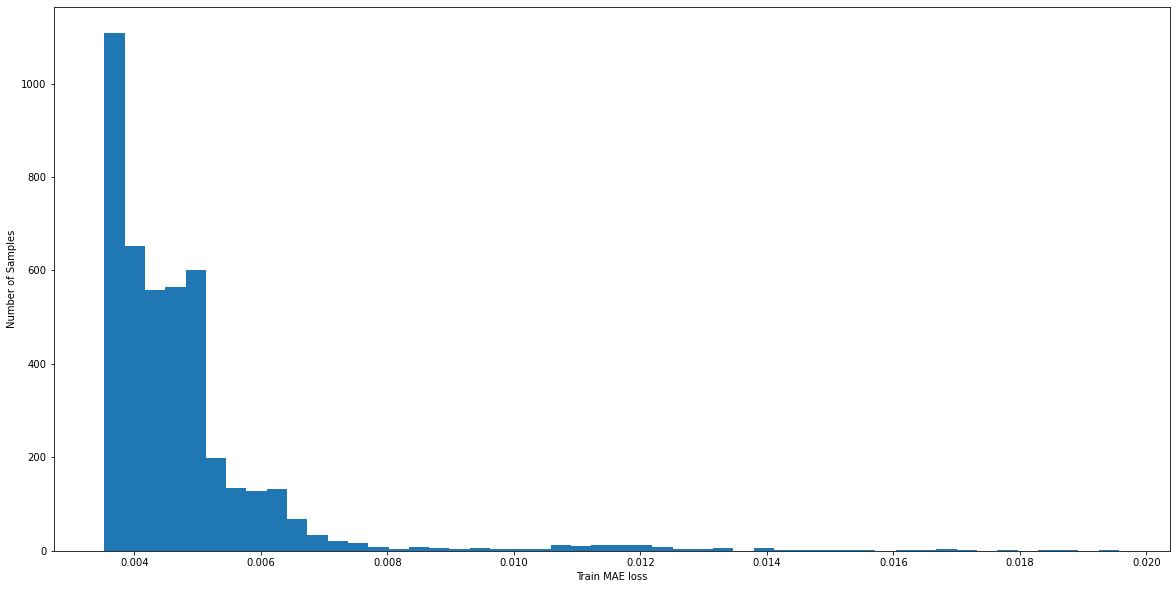

In [269]:
train_prediction = model.predict_generator(train_generator)
train_mae_loss = np.mean(np.abs(train_prediction - train), axis=1)

plt.figure(figsize=(20,10))
plt.hist(train_mae_loss, bins=50)
plt.xlabel('Train MAE loss')
plt.ylabel('Number of Samples');

max_train_threshold = np.max(train_mae_loss)
print(f'Reconstruction error threshold: {max_train_threshold}')

Reconstruction error threshold: 0.006299967848369591


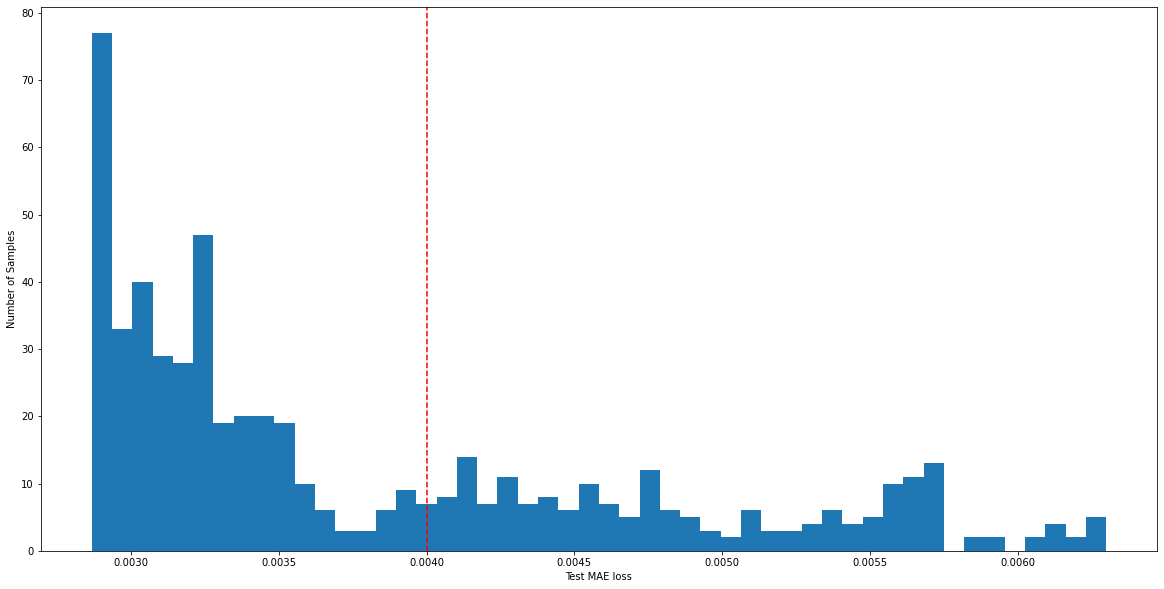

In [270]:
test_prediction = model.predict_generator(test_generator)
test_mae_loss = np.mean(np.abs(test_prediction - test), axis=1)

plt.figure(figsize=(20,10))
plt.hist(test_mae_loss, bins=50)
plt.axvline(0.004, color='red', linestyle='--')
plt.xlabel('Test MAE loss')
plt.ylabel('Number of Samples');

max_test_threshold = np.max(test_mae_loss)
print(f'Reconstruction error threshold: {max_test_threshold}')

In [271]:
# X_train_pred = model.predict(X_train, verbose=0)
# train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

# plt.hist(train_mae_loss, bins=50)
# plt.xlabel('Train MAE loss')
# plt.ylabel('Number of Samples');

# threshold = np.max(train_mae_loss)
# print(f'Reconstruction error threshold: {threshold}')

In [272]:
# X_test_pred = model.predict(X_test, verbose=0)
# test_mae_loss = np.mean(np.abs(X_test_pred-X_test), axis=1)

# plt.hist(test_mae_loss, bins=50)
# plt.xlabel('Test MAE loss')
# plt.ylabel('Number of samples');

In [273]:
train = train.reshape((-1))
test = test.reshape((-1))
test_prediction = test_prediction.reshape((-1))

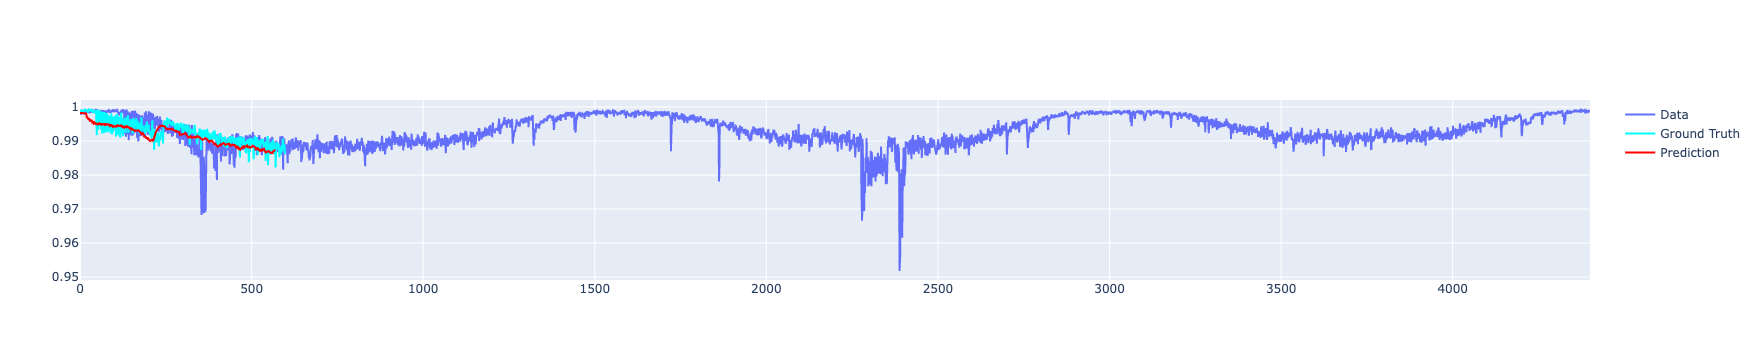

In [274]:
trace1 = go.Scatter(
     y = train,
     mode = 'lines',
     name = 'Data'
 )

trace2 = go.Scatter(
     y = test,
     mode = 'lines',
     name = 'Ground Truth',
     line=dict(color='cyan', width=2)
 )

trace3 = go.Scatter(
     y = test_prediction,
     mode = 'lines',
     name = 'Prediction',
     line=dict(color='red', width=2)
 )

fig = go.Figure(data=[trace1, trace2, trace3])
fig.show()

In [275]:
print(f"Test Prediction Shape: {test_prediction.shape}")
print(f"Ground Thruth Shape: {test.shape}")

Test Prediction Shape: (569,)
Ground Thruth Shape: (599,)


60% max difference: 0.003471
6 sigma difference: 0.006259


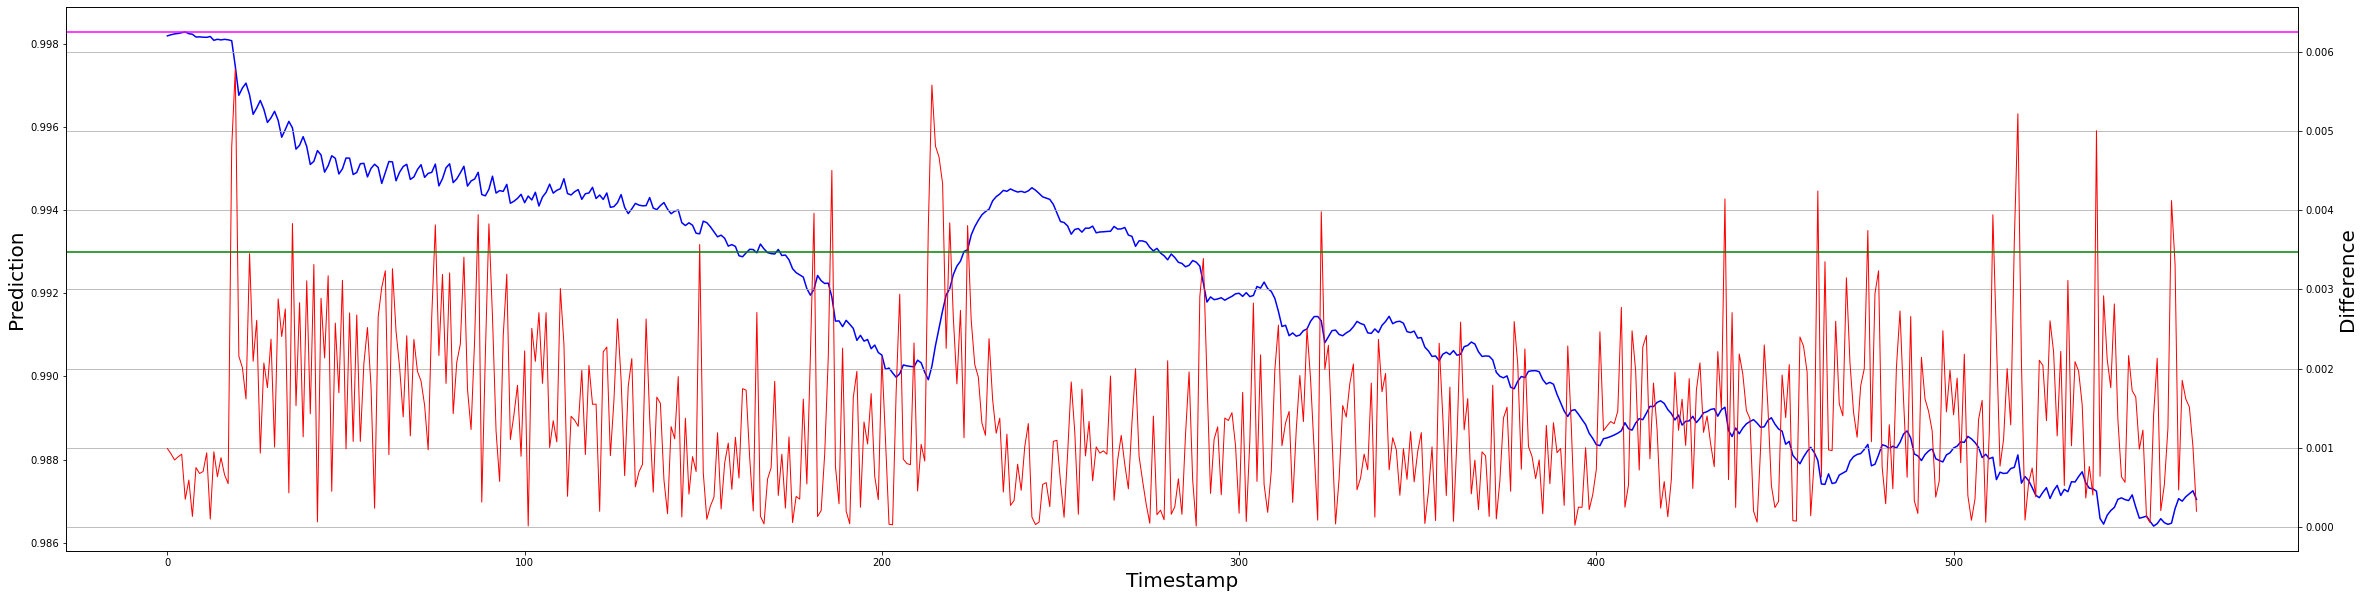

In [295]:
difference=np.abs(test_prediction-test[30:])
max_difference=difference.max()
max60=0.6*max_difference
sigma6=6*difference.std()

print(f"60% max difference: {round(max60,6)}")
print(f"6 sigma difference: {round(sigma6,6)}")

fig, ax2d = plt.subplots(figsize=(40,10))
ax2a = ax2d.twinx()
ax2d.plot(test_prediction, color='blue')
ax2a.plot(difference, color='red', linewidth='1')

ax2a.axhline(max60, color='green')
ax2a.axhline(sigma6, color='magenta')

ax2d.set_xlabel('Timestamp', fontsize=20)
ax2d.set_ylabel('Prediction', fontsize=20)
ax2a.set_ylabel('Difference', fontsize=20)

plt.grid()

In [277]:
difference

array([9.87961966e-04, 9.22273193e-04, 8.42892434e-04, 8.83286184e-04,
       9.16099058e-04, 3.46477081e-04, 5.89587099e-04, 1.29124004e-04,
       7.46808494e-04, 6.71822939e-04, 6.97884556e-04, 9.33820919e-04,
       9.54897051e-05, 9.46709040e-04, 6.32040073e-04, 8.71970800e-04,
       6.56347285e-04, 5.44444713e-04, 4.80036030e-03, 5.78536632e-03,
       2.15619523e-03, 2.00984146e-03, 1.61513719e-03, 3.45396805e-03,
       2.09274051e-03, 2.60979917e-03, 9.29703723e-04, 2.06950670e-03,
       1.75856609e-03, 2.37127458e-03, 1.00613200e-03, 2.88085494e-03,
       2.40503114e-03, 2.75404364e-03, 4.27084798e-04, 3.83449736e-03,
       1.53007688e-03, 2.83331572e-03, 1.13617637e-03, 3.10938544e-03,
       1.42767528e-03, 3.31596326e-03, 5.95429250e-05, 2.88890823e-03,
       2.13370179e-03, 3.17352761e-03, 4.46930646e-04, 2.57464028e-03,
       1.69324744e-03, 3.11589060e-03, 9.84521041e-04, 2.70362895e-03,
       1.07733205e-03, 2.67687745e-03, 1.07767762e-03, 2.06423989e-03,
      

In [278]:
n=0
a=0

new_anomalies_60percentmax=[]

for i in range(len(difference)):
    if difference[i] <= max60:
        n=n+1
        t=0
        new_anomalies_60percentmax.append(t)
        
    elif difference[i] > max60:
        a=a+1
        t=1
        new_anomalies_60percentmax.append(t)

        

print("Number of anomalies after using 60% Max Threshold:")   
print("#################################################:")   
print(f"Number of no anomalies: {n}")
print(f"Number of anomalies: {a}")

Number of anomalies after using 60% Max Threshold:
#################################################:
Number of no anomalies: 544
Number of anomalies: 25


In [279]:
used_time=timestamp[4402:5001]

print(len(difference))
print(len(new_anomalies_60percentmax))

569
569


In [280]:
tp60m=0
fp60m=0
tn60m=0
fn60m=0

for i in range(len(difference)):
    if new_anomalies_60percentmax[i] == 1 and label2[i+4402] == 1:
            tp60m=tp60m+1
    elif new_anomalies_60percentmax[i] == 1 and label2[i+4402] != 1:
            fp60m=fp60m+1
    elif new_anomalies_60percentmax[i] != 1 and label2[i+4402] == 1:
            fn60m=fn60m+1
    elif new_anomalies_60percentmax[i] != 1 and label2[i+4402] != 1:
            tn60m=tn60m+1
            
print("THIS IS FROM USING THE THRESHOLD AS 60% OF THE MAXIMUM VALUES OF THE DIFFERENCE")
print("###################################################################################")
print(f"Number of True Positives: {tp60m}")
print(f"Number of False Positives: {fp60m}")
print(f"Number of True Negatives: {tn60m}")
print(f"Number of False Negatives: {fn60m}")
print("###################################")

precision_60m=tp60m/(tp60m+fp60m)
print(f"Precision: {round(precision_60m,3)}")

recall_60m=tp60m/(tp60m+fn60m)
print(f"Recall: {round(recall_60m,3)}")

F1_Score_60m=(2*precision_60m*recall_60m)/(precision_60m+recall_60m)
print(f"F1 Score: {round(F1_Score_60m,3)}")

THIS IS FROM USING THE THRESHOLD AS 60% OF THE MAXIMUM VALUES OF THE MOVING AVERAGE
###################################################################################
Number of True Positives: 13
Number of False Positives: 12
Number of True Negatives: 359
Number of False Negatives: 185
###################################
Precision: 0.52
Recall: 0.066
F1 Score: 0.117


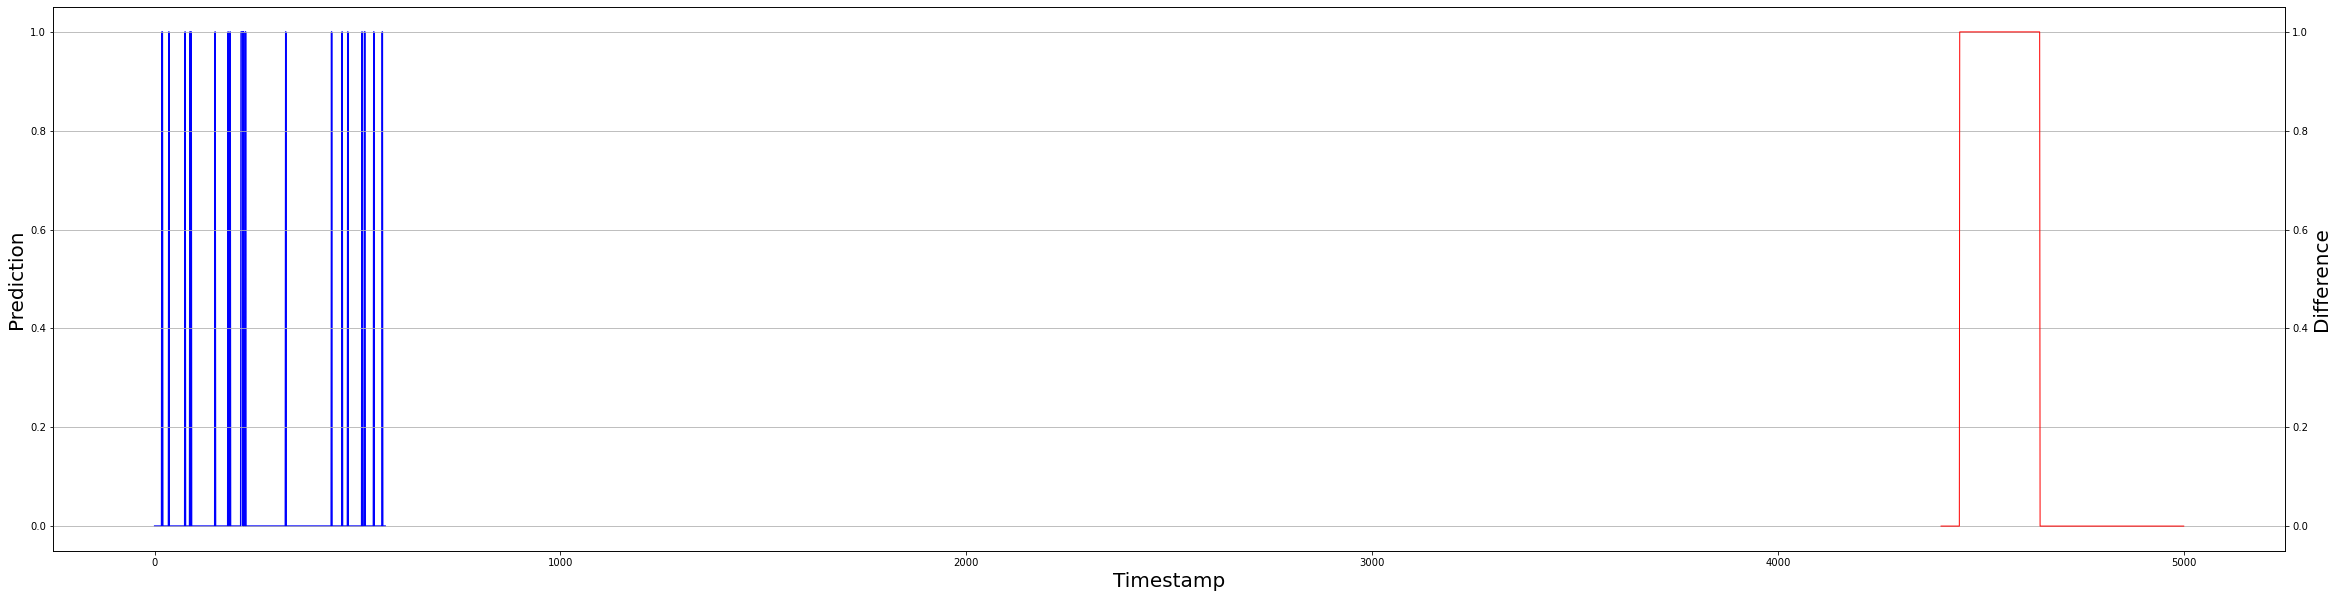

In [313]:
fig, ax2d = plt.subplots(figsize=(40,10))
ax2a = ax2d.twinx()
ax2d.plot(new_anomalies_60percentmax, color='blue')
ax2a.plot(label2[4402:5001], color='red', linewidth='1')

ax2d.set_xlabel('Timestamp', fontsize=20)
ax2d.set_ylabel('Prediction', fontsize=20)
ax2a.set_ylabel('Difference', fontsize=20)

plt.grid()

1. **"close_train"** is the data set used for the training using a certain percentage to split the dataset
2. **"prediction"** speaks for itself, it is basicaly predicting what will happen on the testing data
3. **"close_test"** is the data set used for the testing using the remaining percentage to compare with the prediction, also known as the "Ground Truth"

# Forecasting

In [282]:
kpi=huwaei['kpi_value']
kpi=np.array(kpi)
kpi = kpi.reshape((-1))

In [283]:
kpi.shape

(20159,)

In [284]:
def predict(num_prediction, model):
    prediction_list = train[-(look_back):]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list

In [285]:
# def predict_dates(num_prediction):
#     prediction_dates = timestamp[len(close_train)+1:len(close_train)+num_prediction+1] 
#     return prediction_dates
    
# def predict_dates(num_prediction):
#     last_date = df['Time'].values[-1]
#     prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
#     return prediction_dates

In [286]:
num_prediction = len(test)-1
print(f"Number for predictions: {num_prediction}")

Number for predictions: 598


In [287]:
print("Forecast")
forecast = predict(num_prediction, model)
forecast

Forecast


array([0.99891385, 0.99806589, 0.99798423, 0.99790603, 0.99782705,
       0.99774486, 0.99766153, 0.99757808, 0.99749374, 0.99740863,
       0.99732184, 0.99723703, 0.99715042, 0.99706268, 0.99697429,
       0.99688572, 0.99679607, 0.99670875, 0.99661899, 0.99652755,
       0.99643773, 0.99634659, 0.99625403, 0.99616098, 0.99606764,
       0.9959746 , 0.9958812 , 0.99578631, 0.99569058, 0.99559456,
       0.9954983 , 0.9954015 , 0.99530715, 0.9952122 , 0.99511731,
       0.995022  , 0.99492669, 0.99483109, 0.99473506, 0.99463904,
       0.99454272, 0.99444616, 0.9943493 , 0.99425232, 0.99415529,
       0.99405777, 0.99396026, 0.99386245, 0.99376446, 0.99366617,
       0.99356782, 0.99346918, 0.99337018, 0.99327129, 0.99317205,
       0.99307251, 0.99297303, 0.99287319, 0.99277329, 0.99267322,
       0.99257272, 0.99247217, 0.99237138, 0.99227053, 0.9921692 ,
       0.99206811, 0.99196643, 0.99186474, 0.991763  , 0.99166083,
       0.99155843, 0.99145609, 0.99135345, 0.99125063, 0.99114

In [288]:
# print("Forecast Dates")
# forecast_dates = predict_dates(num_prediction)
# print(forecast_dates)

In [289]:
# def predict_dates(num_prediction):
#     prediction_dates = df['Time'][len(close_train)+1:len(close_train)+num_prediction+1] 
#     return prediction_dates

# predict_dates(5)

In [290]:
# df['Time'].values[-400]

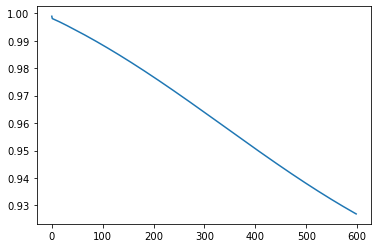

In [291]:
plt.plot(forecast)

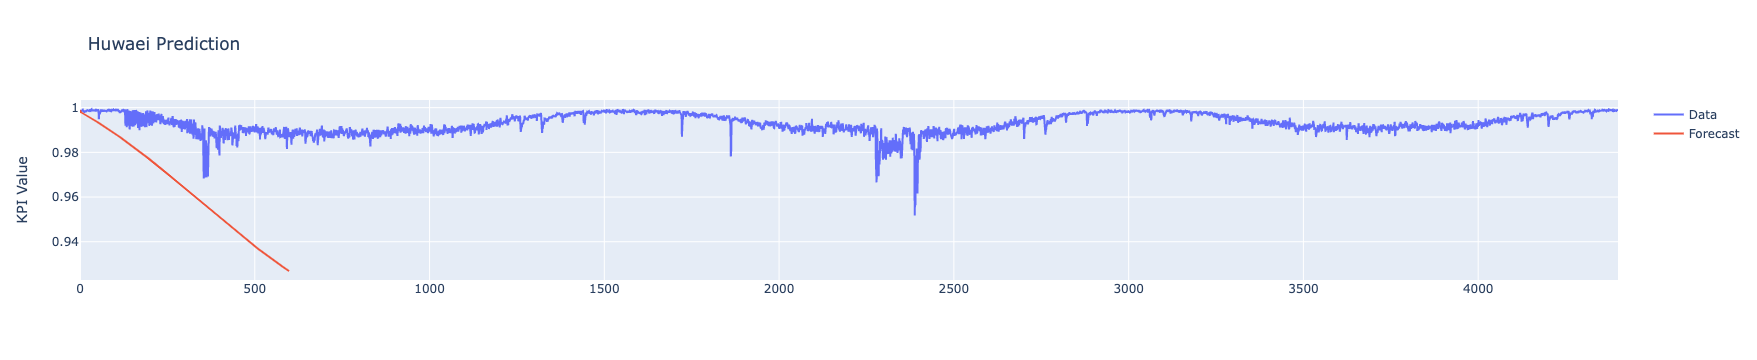

In [292]:
trace1 = go.Scatter(
    y = train,
    mode = 'lines',
    name = 'Data'
)

trace3 = go.Scatter(
    y = forecast,
    mode = 'lines',
    name = 'Forecast'
)

layout = go.Layout(
    title = "Huwaei Prediction",
    yaxis = {'title' : "KPI Value"}
)
fig = go.Figure(data=[trace1, trace3], layout=layout)
fig.show()

This prediction behavior is normal because of the propogation from the small error in the begining to propogate into a larger error during the forecast phase